In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

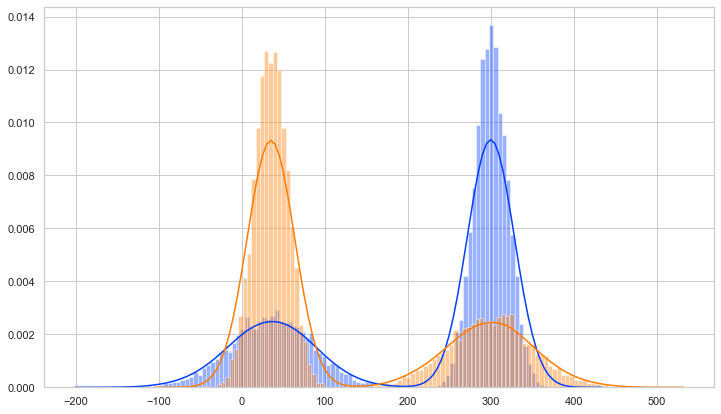

In [2]:
value1 = np.random.normal(loc=35,scale=50,size=5000)
value2 =  np.random.normal(loc=300,scale=20,size=10000)
q1 = np.concatenate((value1,value2))
value1 = np.random.normal(loc=300,scale=50,size=5000)
value2 =  np.random.normal(loc=35,scale=20,size=10000)
q2 = np.concatenate((value1,value2))
fig = plt.subplots(1,1,figsize = (12,7))
sns.distplot(q1,bins=100)
sns.distplot(q2,bins=100)

[(0.666751403003012, 299.7192836090384), (0.33324859699698806, 35.691143159268464)]
[(0.6666583503572058, 0.905927671506478), (0.33334164964279384, 302.3558166006801)]
[298.8133559375319, 266.66467344141165]
[9.30526458062797e-05, 9.30526458057801e-05]
[(0.666751403003012, 299.7192836090384), (0.33324859699698806, 35.691143159268464)]
[(0.6666647744196085, 20.339644982179315), (0.33333522558039197, 299.15236019474423)]
[279.3796386268591, 263.4612170354758]
[8.66285834035807e-05, 8.662858340391377e-05]
[(0.666751403003012, 299.7192836090384), (0.33324859699698806, 35.691143159268464)]
[(0.6669039107776081, 40.19067401004916), (0.33309608922239053, 301.71842405457363)]
[259.52860959898925, 266.0272808953052]
[0.0001525077745960779, 0.00015250777459752118]
[(0.666751403003012, 299.7192836090384), (0.33324859699698806, 35.691143159268464)]
[(0.6671283589810093, 59.43870032166106), (0.3328716410189914, 297.66889150537855)]
[240.28058328737737, 261.9777483461101]
[0.0003769559779972509, 0.0

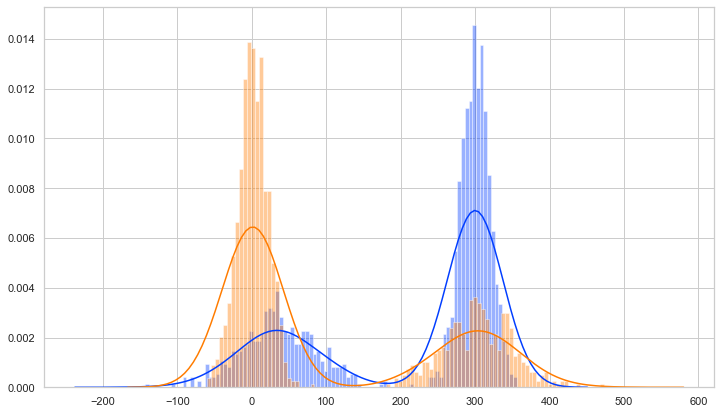

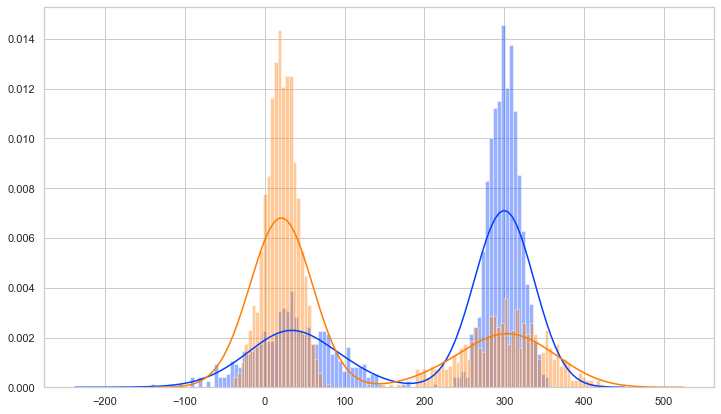

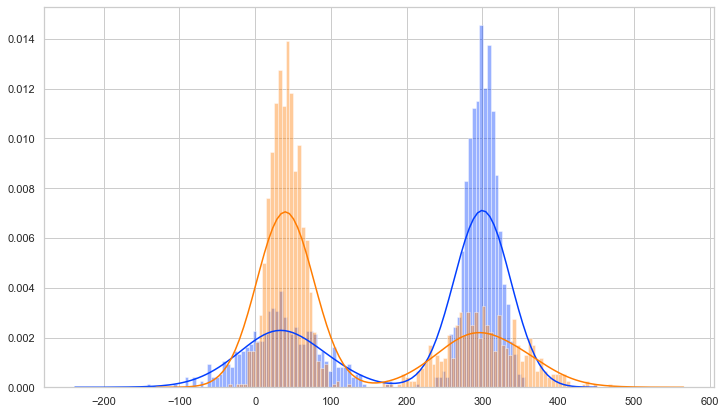

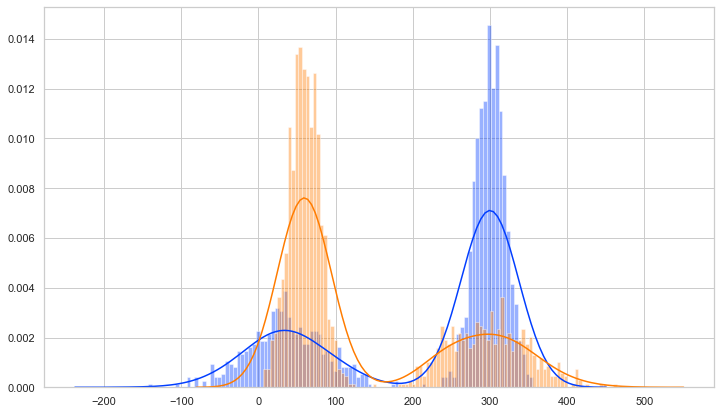

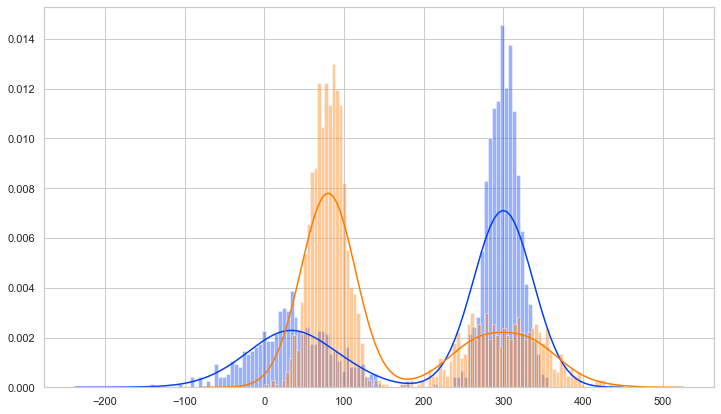

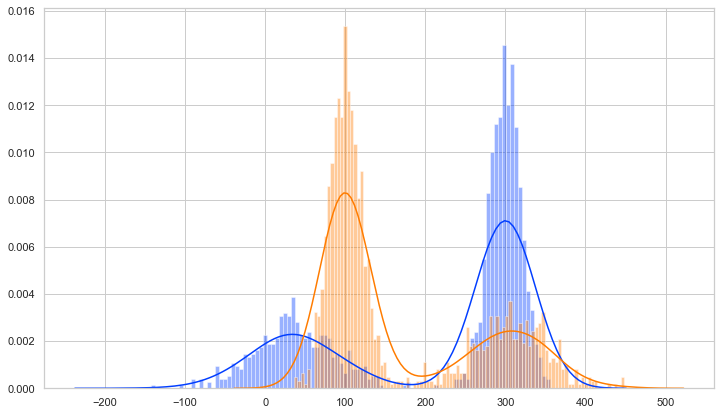

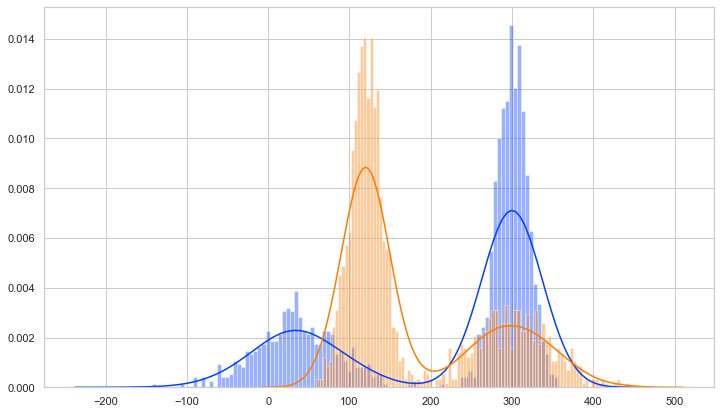

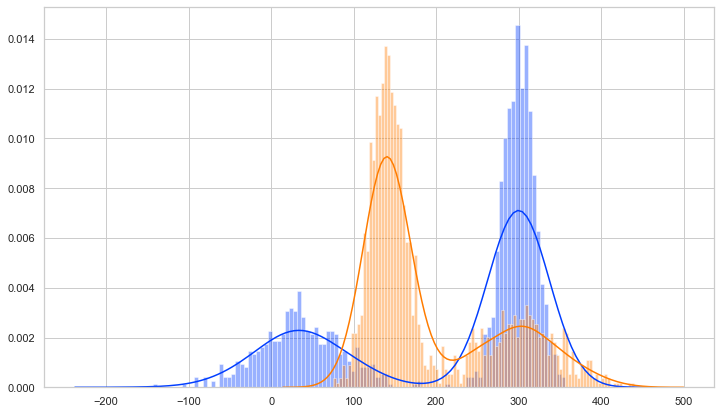

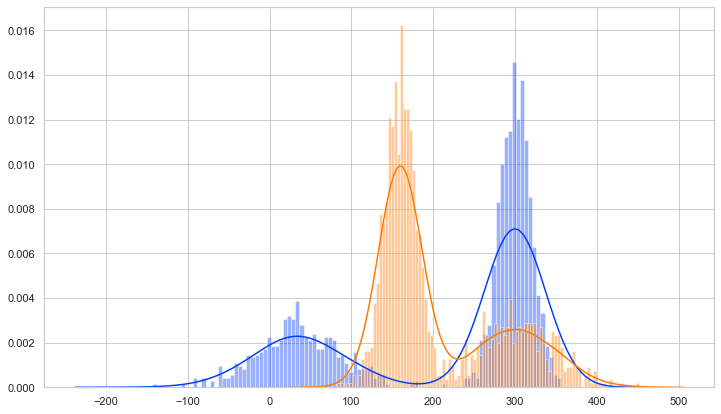

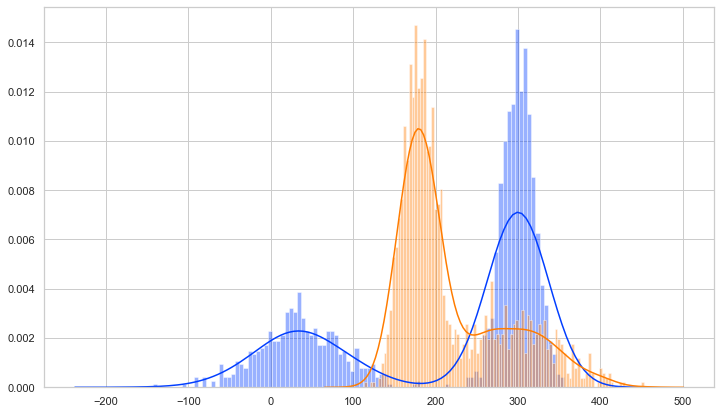

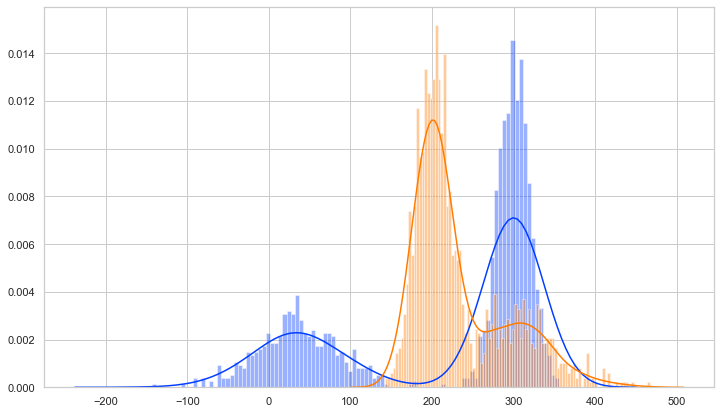

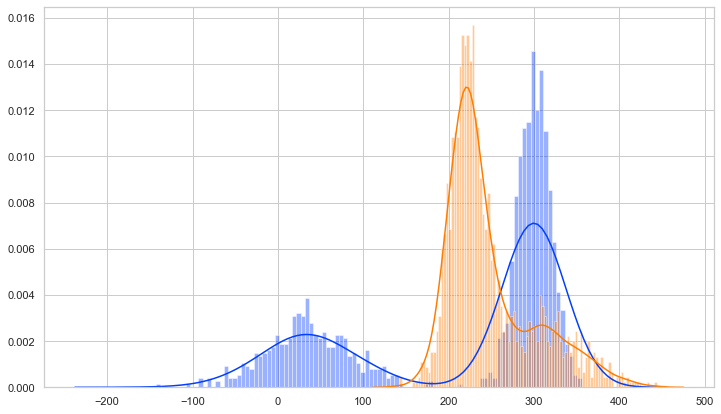

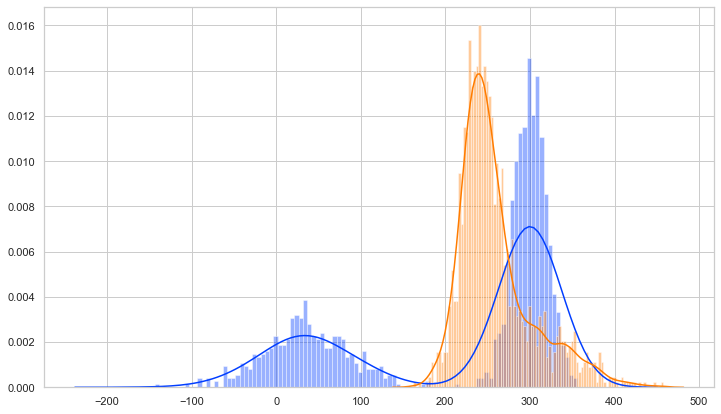

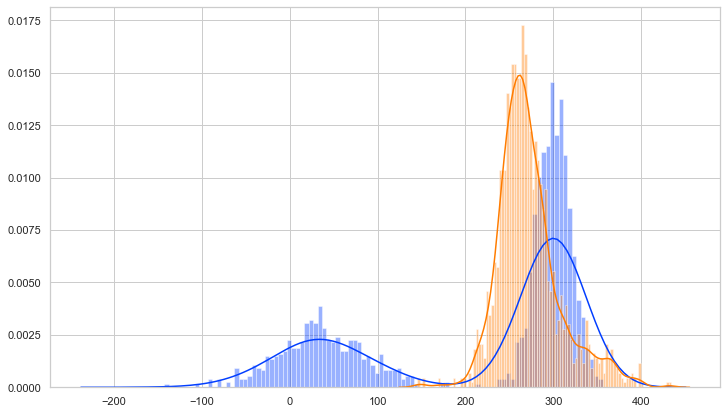

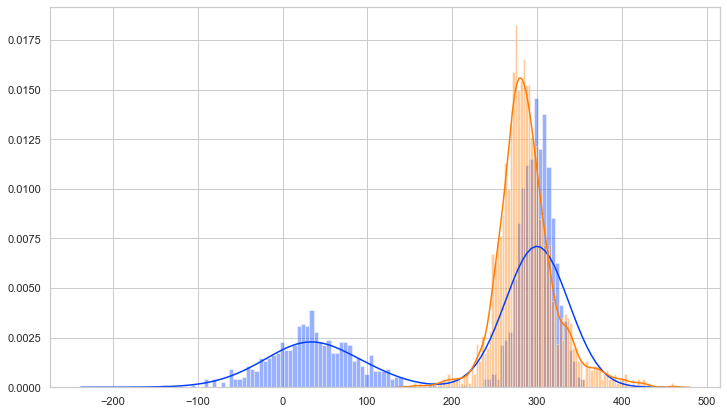

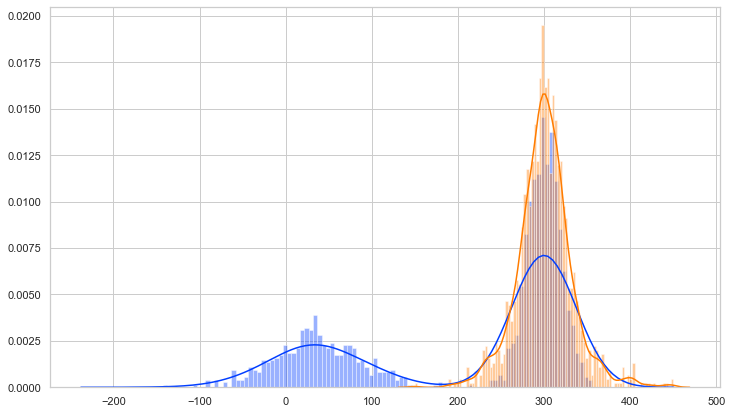

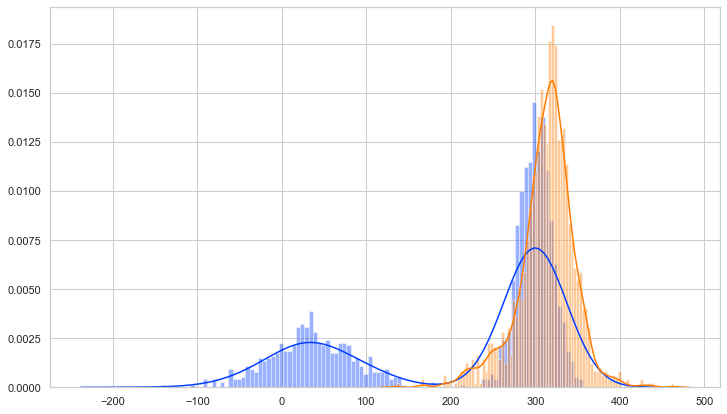

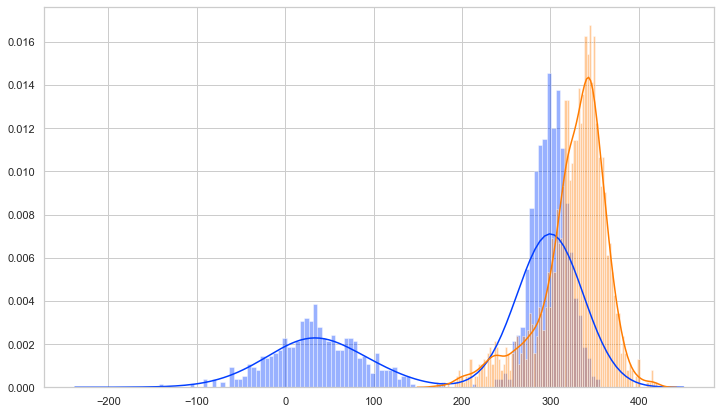

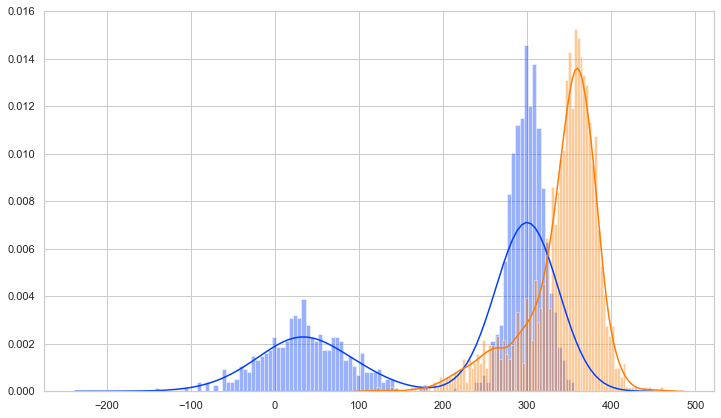

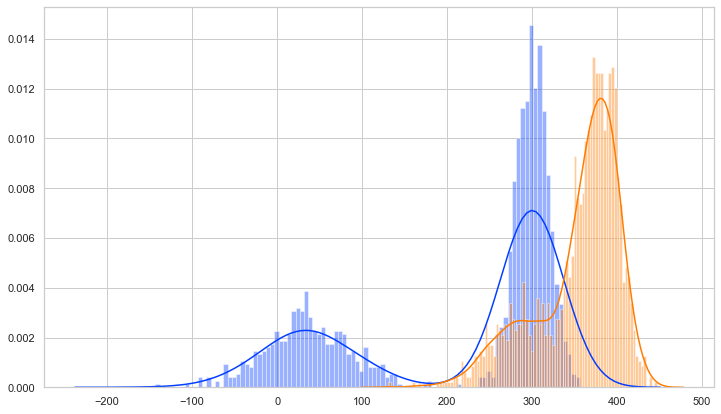

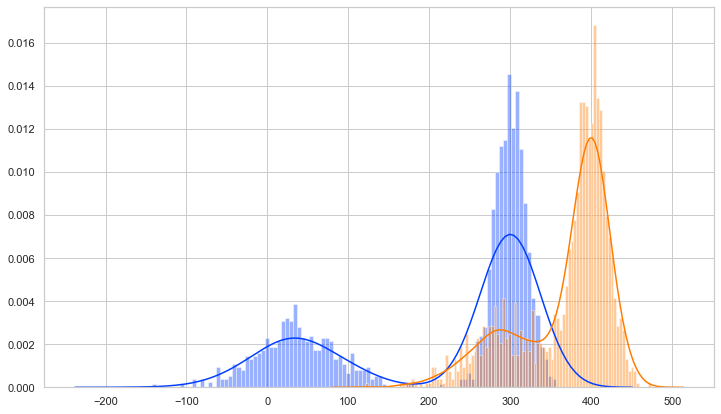

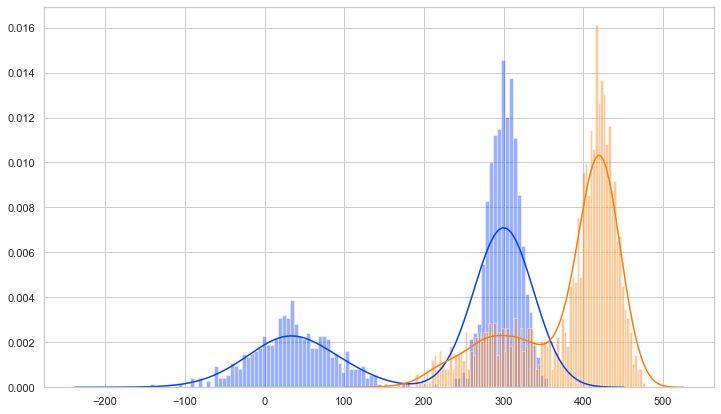

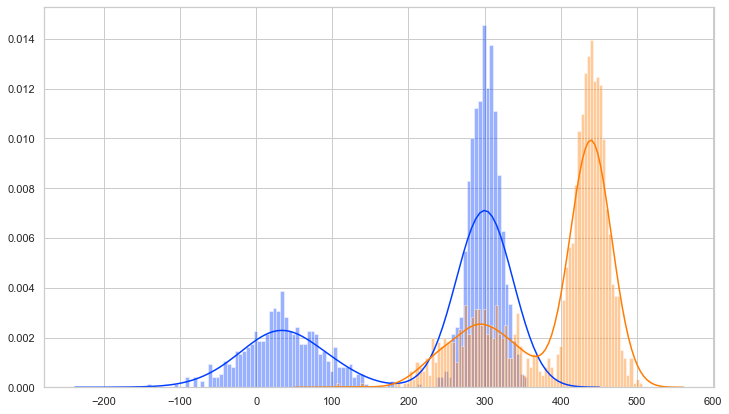

In [19]:
mkc = 450
mymeans=[]
newmet=0
ilist=[]
ilist1=[]
value1 = np.random.normal(loc=35,scale=50,size=500)
value2 =  np.random.normal(loc=300,scale=20,size=1000)
q1 = np.concatenate((value1,value2))
for f in range(0,450,20):
    mkc = mkc - 20
    value1 = np.random.normal(loc=35,scale=50,size=500)
    value2 =  np.random.normal(loc=mkc,scale=20,size=1000)
    q1 = np.concatenate((value1,value2))
    value1 = np.random.normal(loc=300,scale=50,size=5000)
    value2 =  np.random.normal(loc=f,scale=20,size=10000)
    q2 = np.concatenate((value1,value2))
    fig = plt.subplots(1,1,figsize = (12,7))
    sns.distplot(q1,bins=100)
    sns.distplot(q2,bins=100)
    plt.show()
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
            q1 = np.asarray(q1)
            q1 =q1.reshape(-1,1)
            gmm.fit(q1)
            bic.append(gmm.bic(q1))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmq1 = gmm
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            q2 = np.asarray(q2)
            q2 =q2.reshape(-1,1)
            gmm.fit(q2)
            bic.append(gmm.bic(q2))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmq2 = gmm
  
    means=[]
    for i in range(len(best_gmmq1.means_)):
        means.append(best_gmmq1.means_[i][0])
    x = dict(zip(best_gmmq1.weights_,means))
    od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
    od1 = list(zip(list(od1.keys()),list(od1.values())))
    print(od1)
    means=[]
    for i in range(len(best_gmmq2.means_)):
        means.append(best_gmmq2.means_[i][0])
    y = dict(zip(best_gmmq2.weights_,means))
    od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
    od2 = list(zip(list(od2.keys()),list(od2.values())))
    print(od2)
    thres = 0.05
    diffmean = []
    diffweights = []
    for i in range(min(len(od1),len(od2))):
        diffmean.append(od1[i][1] - od2[i][1])
        diffweights.append(od1[i][0] - od2[i][0])
    print(diffmean)
    print(diffweights)
    g=np.sum(diffmean * diffweights)
    newmet.append(g)
    mymeans.append(diffmean[0])
    ilist.append(f)
    ilist1.append(mkc)

In [8]:
diffmean = np.array(diffmean)
diffweights = np.array(diffweights) 

In [17]:
x=diffmean * diffweights
np.sum(x)

1.3421838936046886

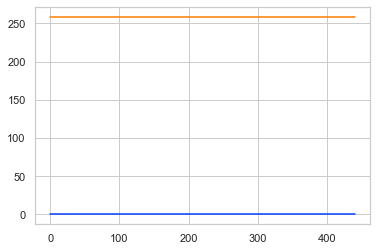

In [26]:
sns.lineplot(ilist,diffweights[1])
sns.lineplot(ilist,diffmean[1])

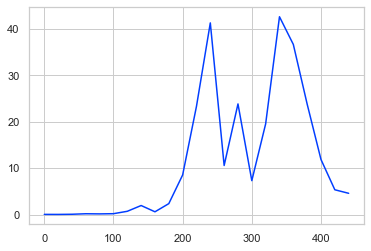

In [28]:
diffmean
diffweight

NameError: name 'diffweight' is not defined

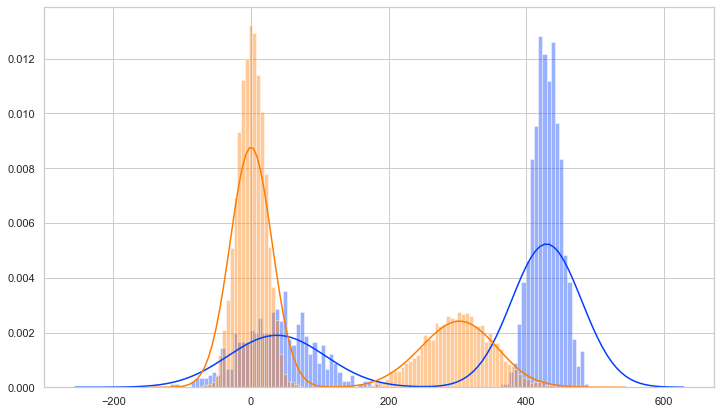

[(0.6666666666180655, 429.55737053879534), (0.3333333333819341, 37.27103463479718)]
[(0.6666655160312958, 0.07340535314904754), (0.33333448396870907, 300.8605457712672)]
[429.4839651856463, -263.58951113647004]
[1.1505867697492178e-06, -1.150586774967266e-06]


TypeError: can't multiply sequence by non-int of type 'list'

In [29]:
mkc = 450
mymeans=[]
newmet=0
ilist=[]
ilist1=[]
value1 = np.random.normal(loc=35,scale=50,size=500)
value2 =  np.random.normal(loc=300,scale=20,size=1000)
q1 = np.concatenate((value1,value2))
for f in range(0,450,20):
    mkc = mkc - 20
    value1 = np.random.normal(loc=35,scale=50,size=500)
    value2 =  np.random.normal(loc=mkc,scale=20,size=1000)
    q1 = np.concatenate((value1,value2))
    value1 = np.random.normal(loc=300,scale=50,size=5000)
    value2 =  np.random.normal(loc=f,scale=20,size=10000)
    q2 = np.concatenate((value1,value2))
    fig = plt.subplots(1,1,figsize = (12,7))
    sns.distplot(q1,bins=100)
    sns.distplot(q2,bins=100)
    plt.show()
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
            q1 = np.asarray(q1)
            q1 =q1.reshape(-1,1)
            gmm.fit(q1)
            bic.append(gmm.bic(q1))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmq1 = gmm
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            q2 = np.asarray(q2)
            q2 =q2.reshape(-1,1)
            gmm.fit(q2)
            bic.append(gmm.bic(q2))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmq2 = gmm
  
    means=[]
    for i in range(len(best_gmmq1.means_)):
        means.append(best_gmmq1.means_[i][0])
    x = dict(zip(best_gmmq1.weights_,means))
    od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
    od1 = list(zip(list(od1.keys()),list(od1.values())))
    print(od1)
    means=[]
    for i in range(len(best_gmmq2.means_)):
        means.append(best_gmmq2.means_[i][0])
    y = dict(zip(best_gmmq2.weights_,means))
    od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
    od2 = list(zip(list(od2.keys()),list(od2.values())))
    print(od2)
    thres = 0.05
    diffmean = []
    diffweights = []
    for i in range(min(len(od1),len(od2))):
        diffmean.append(od1[i][1] - od2[i][1])
        diffweights.append(od1[i][0] - od2[i][0])
    print(diffmean)
    print(diffweights)
    g=np.sum(diffmean * diffweights)
    newmet.append(g)
    mymeans.append(diffmean[0])
    ilist.append(f)
    ilist1.append(mkc)

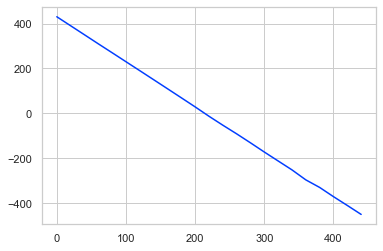

In [37]:
sns.lineplot(ilist,mymeans)

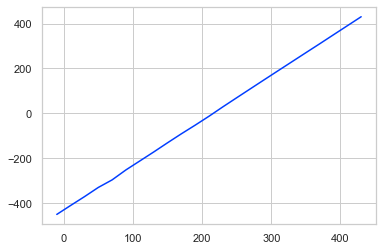

In [38]:
sns.lineplot(ilist1,mymeans)

[(0.7810961135984251, 357.9953376671169),
 (0.21890388640157418, 276.531896129616)]